### Descripción del proyecto
La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Tienes acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos (del proyecto del sprint de Análisis estadístico de datos). Para esta tarea de clasificación debes crear un modelo que escoja el plan correcto. Como ya hiciste el paso de procesar los datos, puedes lanzarte directo a crear el modelo.

Desarrolla un modelo con la mayor exactitud posible. En este proyecto, el umbral de exactitud es 0.75. Usa el dataset para comprobar la exactitud.

#### Descripción de datos
Cada observación en el dataset contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:

* сalls — número de llamadas,
* minutes — duración total de la llamada en minutos,
* messages — número de mensajes de texto,
* mb_used — Tráfico de Internet utilizado en MB,
* is_ultra — plan para el mes actual (Ultra - 1, Smart - 0).

In [1]:
# Importar bibliotecas estándar
import numpy as np
import pandas as pd

# Importar bibliotecas de scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importar bibliotecas para visualización
import matplotlib.pyplot as plt

In [2]:
# Cargamos los datos
raw_user = pd.read_csv('../datasets/users_behavior.csv')
raw_user

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
# Resumen de datos
raw_user.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
# Revisamos si hay duplicados
raw_user.duplicated().value_counts()

False    3214
Name: count, dtype: int64

In [5]:
# Dividimos entre caracteristicas (features) y objetivos (target)

features = raw_user.drop('is_ultra', axis=1)
target = raw_user['is_ultra']

In [6]:
# Datos de entrenamiento y datos de validacion para entrenar modelo de machine learning
train_features, valid_features, train_target, valid_target = train_test_split(features, target, random_state=54321, test_size=0.25)

#### Investigaremos la calidad de diferentes modelos cambiando los hiperparámetros.
Comprueba la calidad del modelo usando el conjunto de prueba y haremos una prueba de cordura al modelo.

Nota:
- Sabemos que para el objetivo de mayor exactitud, apesar del costo computacional tenemos el Random Forrest Classifier
- Realizamos una validacion cruzada por el metodo de k-fold.

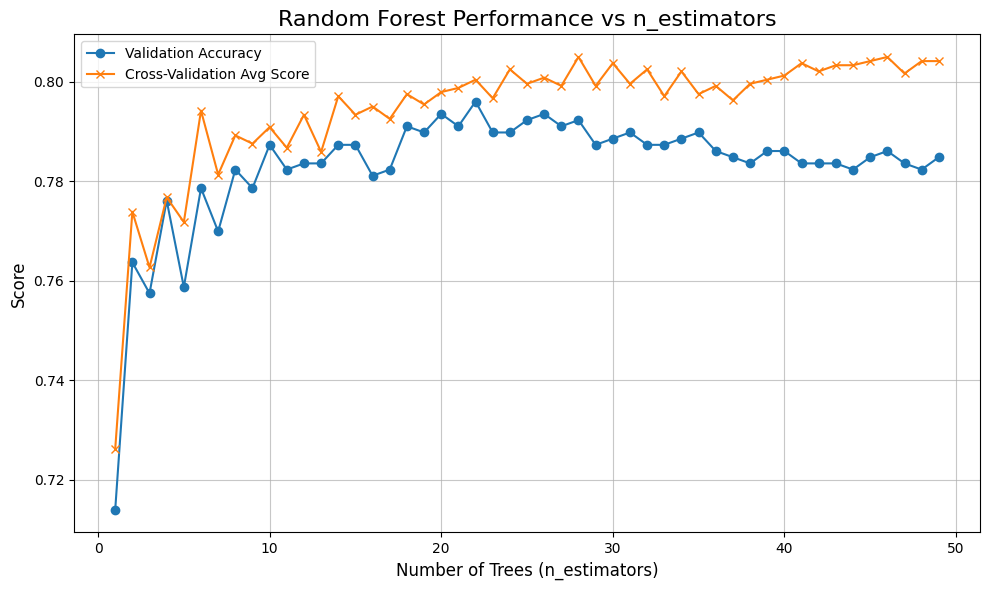

In [7]:
# Evaluar el modelo Random Forest con diferentes valores de n_estimators y validacion cruzada
n_list = []
accuracy_list = []
avg_score_list = []

# Definir el rango para n_estimators
for n in range(1, 50):
    # Creamos el modelo con el valor actual de n_estimators
    model_classifier = RandomForestClassifier(random_state=42, n_estimators=n)
    
    # Ajustamos el modelo a los datos de entrenamiento
    model_classifier.fit(train_features, train_target)
    
    # Predecir con los datos de validación
    predicted = model_classifier.predict(valid_features)
    
    # Calculamos la exactitud del modelo
    accuracy = accuracy_score(valid_target, predicted)
    
    # Validación cruzada por k-fold
    scores = cross_val_score(model_classifier, train_features, train_target, cv=10)
    avg_score = scores.mean()
    
    # Almacenamos resultados
    n_list.append(n)
    accuracy_list.append(accuracy)
    avg_score_list.append(avg_score)

# Visualizacion los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_list, accuracy_list, label="Validation Accuracy", marker='o')
plt.plot(n_list, avg_score_list, label="Cross-Validation Avg Score", marker='x')
plt.title("Random Forest Performance vs n_estimators", fontsize=16)
plt.xlabel("Number of Trees (n_estimators)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


### Conclusiones
- Escogimos directamente el metodo de Clasificacion por Arboles Aleatorios porque es el que nos da la mayor exactitud posible, ya que el costo computacional no es una condicion del proyecto.
- En este caso solo la magnitud del proyecto no es tan grande , logramos estimar los hiperparametros para alcanzar el objetivo de maxima exactidud 80% en este caso.
